In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.QSVM import QSVM

In [2]:
n_M = 2
n_N = 2

M = 2**n_M - 1
N = 2**n_N - 1

X_train = np.random.random((M,N))
X_train = np.array([v/np.linalg.norm(v) for v in X_train])
print('X_train:\n',X_train)

y_train = np.random.choice([-1,1], size=(M,), replace=True)
print('y_train:\n',y_train)
print('------------------')

X_test = np.random.random((N,))
print('X_test:\n',X_test)

X_train:
 [[0.53440739 0.50251297 0.67962449]
 [0.97709932 0.00737661 0.21265583]
 [0.75474667 0.4328591  0.49294062]]
y_train:
 [ 1  1 -1]
------------------
X_test:
 [0.17857907 0.28355793 0.11588699]


In [3]:
clf = QSVM(n_l=1)
clf.fit(X_train, y_train)

In [4]:
clf.predict(X_test)

1

In [5]:
def generate_random_data(M, N, info=False):
    X_train = np.random.random((M,N))
    X_train = np.array([v/np.linalg.norm(v) for v in X_train])
    if(info): print('X_train:\n',X_train)

    y_train = np.random.choice([-1,1], size=(M,), replace=True)
    if(info): print('y_train:\n',y_train)
    if(info): print('------------------')

    X_test = np.random.random((N,))
    if(info): print('X_test:\n',X_test)
    return(X_train, y_train, X_test)

def get_fidelity(n_l, X_train, y_train):
    clf = QSVM(n_l=n_l)
    clf.fit(X_train, y_train)
    return(clf.fidelity)

def get_fidelity_statistics(n_l, reps = 10, M=3, N=3):
    df_fidelity = pd.DataFrame(columns=['n_l','M','N','fidelity'])
    for _ in range(reps):
        X_train, y_train, X_test = generate_random_data(M=M,N=N)
        clf = QSVM(n_l=n_l)
        clf.fit(X_train, y_train)
        #df_fidelity.append({'n_l': n_l, 'M': M, 'N': N, 'fidelity': clf.fidelity}, ignore_index=True)

        df_fidelity.loc[len(df_fidelity)] = {'n_l': n_l, 'M': M, 'N': N, 'fidelity': clf.sol_fidelity}
        df_fidelity = df_fidelity.reset_index(drop=True)
    return(df_fidelity)

In [10]:
n_l_max = 7

fidelities_l_M3 = []

for n_l in range(1,n_l_max+1):
    fidelities_l_M3.append(get_fidelity_statistics(n_l, M=3, reps=200))

print('M3 done')

fidelities_l_M7 = []

for n_l in range(1,n_l_max+1):
    fidelities_l_M7.append(get_fidelity_statistics(n_l, M=7, reps=200))

M3 done


In [14]:
df = pd.concat(fidelities_l_M3)
dfM7 = pd.concat(fidelities_l_M7)

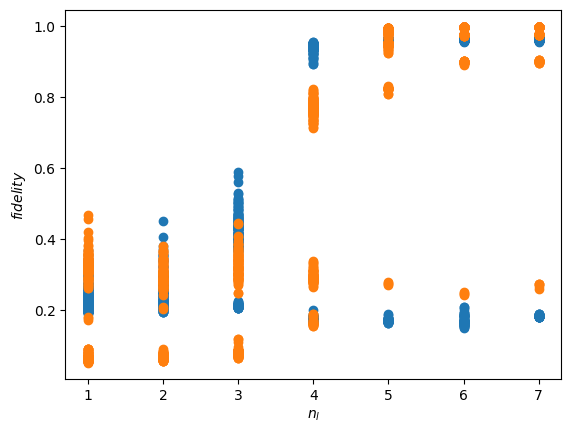

In [15]:
plt.scatter(df['n_l'], df['fidelity'])
plt.scatter(dfM7['n_l'], dfM7['fidelity'])
plt.ylabel('$fidelity$')
plt.xlabel('$n_l$')
plt.show()

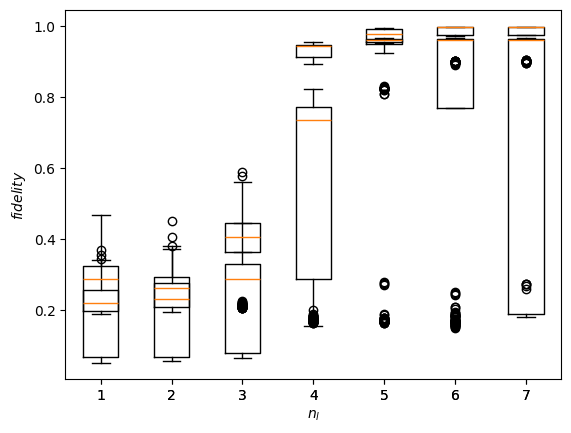

In [13]:
data_M3 = [df['fidelity'] for df in fidelities_l_M3]
data_M7 = [df['fidelity'] for df in fidelities_l_M7]

plt.boxplot(data_M3)
plt.boxplot(data_M7)
plt.ylabel('$fidelity$')
plt.xlabel('$n_l$')
plt.show()

In [25]:
np.median(np.array(data_M3), axis=1)

array([0.22153565, 0.23266449, 0.40659019, 0.94317317, 0.96054439,
       0.96100778, 0.96112611])

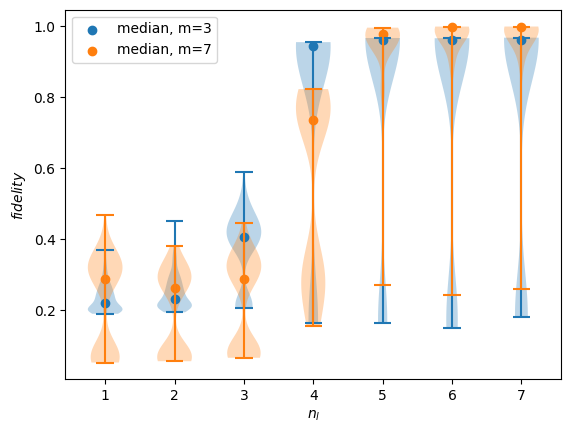

In [33]:
data_M3 = [df['fidelity'] for df in fidelities_l_M3]
data_M7 = [df['fidelity'] for df in fidelities_l_M7]



plt.violinplot(data_M3)
plt.violinplot(data_M7)

plt.scatter(list(range(1,len(np.median(np.array(data_M3), axis=1))+1)),np.median(np.array(data_M3), axis=1), label = 'median, m=3')
plt.scatter(list(range(1,len(np.median(np.array(data_M7), axis=1))+1)),np.median(np.array(data_M7), axis=1), label = 'median, m=7')

plt.ylabel('$fidelity$')
plt.xlabel('$n_l$')
plt.legend()

plt.savefig('fidelity.pdf', transparent=True)
plt.show()